In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [418]:
data = pd.read_csv('COVID-19-time-series-clean-complete.csv')
data

,Unnamed: 0,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,1/22/2020,Afghanistan,0,0,0,0,0,0,0
1,1,1/22/2020,Albania,0,0,0,0,0,0,0
2,2,1/22/2020,Algeria,0,0,0,0,0,0,0
3,3,1/22/2020,Andorra,0,0,0,0,0,0,0
4,4,1/22/2020,Angola,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
108654,108654,8/6/2021,Vietnam,193381,3016,0,190365,4315,296,0
108655,108655,8/6/2021,West Bank and Gaza,317703,3611,0,314092,169,2,0
108656,108656,8/6/2021,Yemen,7131,1384,0,5747,27,1,0
108657,108657,8/6/2021,Zambia,199135,3459,0,195676,680,12,0


In [419]:
data['Date']=pd.to_datetime(data['Date'])
data['Month'] = data['Date'].map(lambda date: 100*date.year + date.month)
data['Month']

0         202001
1         202001
2         202001
3         202001
4         202001
           ...  
108654    202108
108655    202108
108656    202108
108657    202108
108658    202108
Name: Month, Length: 108659, dtype: int64

In [420]:
each_country = data.query("Month == 202004").groupby(['Country','Month'])['New cases'].sum().reset_index()
each_country

,Country,Month,New cases
0,Afghanistan,202004,1952
1,Albania,202004,530
2,Algeria,202004,3290
3,Andorra,202004,369
4,Angola,202004,20
...,...,...,...
188,Vietnam,202004,58
189,West Bank and Gaza,202004,225
190,Yemen,202004,6
191,Zambia,202004,71


In [421]:
index_sorted = each_country.sort_values('New cases',ascending = False).reset_index()
index_sorted.head(8)

,index,Country,Month,New cases
0,179,US,202004,888804
1,61,France,202004,140313
2,183,United Kingdom,202004,139956
3,162,Spain,202004,127546
4,178,Turkey,202004,106673
5,142,Russia,202004,104161
6,84,Italy,202004,99671
7,65,Germany,202004,91201


In [422]:
Iran_country = data.query("Month == 202004 and Country == 'Iran'")

Iran_country

,Unnamed: 0,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Month
13590,13590,2020-04-01,Iran,47593,3036,15473,29084,2988,138,817,202004
13783,13783,2020-04-02,Iran,50468,3160,16711,30597,2875,124,1238,202004
13976,13976,2020-04-03,Iran,53183,3294,17935,31954,2715,134,1224,202004
14169,14169,2020-04-04,Iran,55743,3452,19736,32555,2560,158,1801,202004
14362,14362,2020-04-05,Iran,58226,3603,19736,34887,2483,151,0,202004
14555,14555,2020-04-06,Iran,60500,3739,24236,32525,2274,136,4500,202004
14748,14748,2020-04-07,Iran,62589,3872,27039,31678,2089,133,2803,202004
14941,14941,2020-04-08,Iran,64586,3993,29812,30781,1997,121,2773,202004
15134,15134,2020-04-09,Iran,66220,4110,32309,29801,1634,117,2497,202004
15327,15327,2020-04-10,Iran,68192,4232,35465,28495,1972,122,3156,202004


C:\Users\User\AppData\Local\Temp/ipykernel_3128/4228507181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iran_country['Date'] = Iran_country['Date'].map(lambda date: date.day)


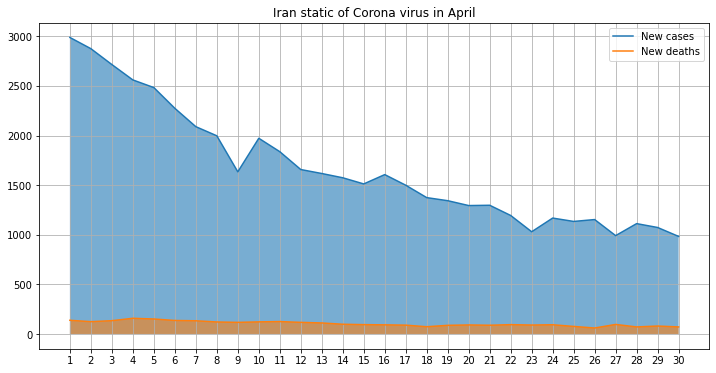

In [423]:
Iran_country = data.query("Month == 202004 and Country == 'Iran'")

plt.figure(figsize=(12,6))
plt.grid()
plt.title('Iran static of Corona virus in April')

Iran_country['Date'] = Iran_country['Date'].map(lambda date: date.day)

x_cases = Iran_country['Date'].to_numpy(dtype=str)
y_cases = Iran_country['New cases']

plt.plot(x_cases,y_cases,label="New cases")
plt.fill_between(x_cases,y_cases,alpha=0.6)

x_deaths = Iran_country['Date'].to_numpy(dtype=str)
y_deaths = Iran_country['New deaths']

plt.plot(x_deaths,y_deaths,label="New deaths")
plt.fill_between(x_deaths,y_deaths,alpha=0.6)

plt.legend()